# Case-Study 1 (Decision Tree,Randome Forest,KNN,NB)

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attribute. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Breast Cancer Data Set Attribute Information:
1. Sample code number: id number
2. Clump Thickness: 1 – 10
3. Uniformity of Cell Size: 1 – 10
4. Uniformity of Cell Shape: 1 – 10
5. Marginal Adhesion: 1 – 10
6. Single Epithelial Cell Size: 1 – 10
7. Bare Nuclei: 1 – 10
8. Bland Chromatin: 1 – 10
9. Normal Nucleoli: 1 – 10
10. Mitoses: 1 – 10
11. Class: (2 for benign, 4 for malignant)

### 1.2 Import the Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.3 Load the dataset

In [45]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\6.SLC\\Take Home\\Day 3\\wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.shape

(569, 32)

### 1.4 Check the data type for dataset?

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [50]:
#Conclusion: except our label, all features are either float or int

### 1.5 Check the data.describe for dataset?

In [51]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [52]:
df.groupby(df['diagnosis']).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [46]:
df=df.drop('id',axis=1)

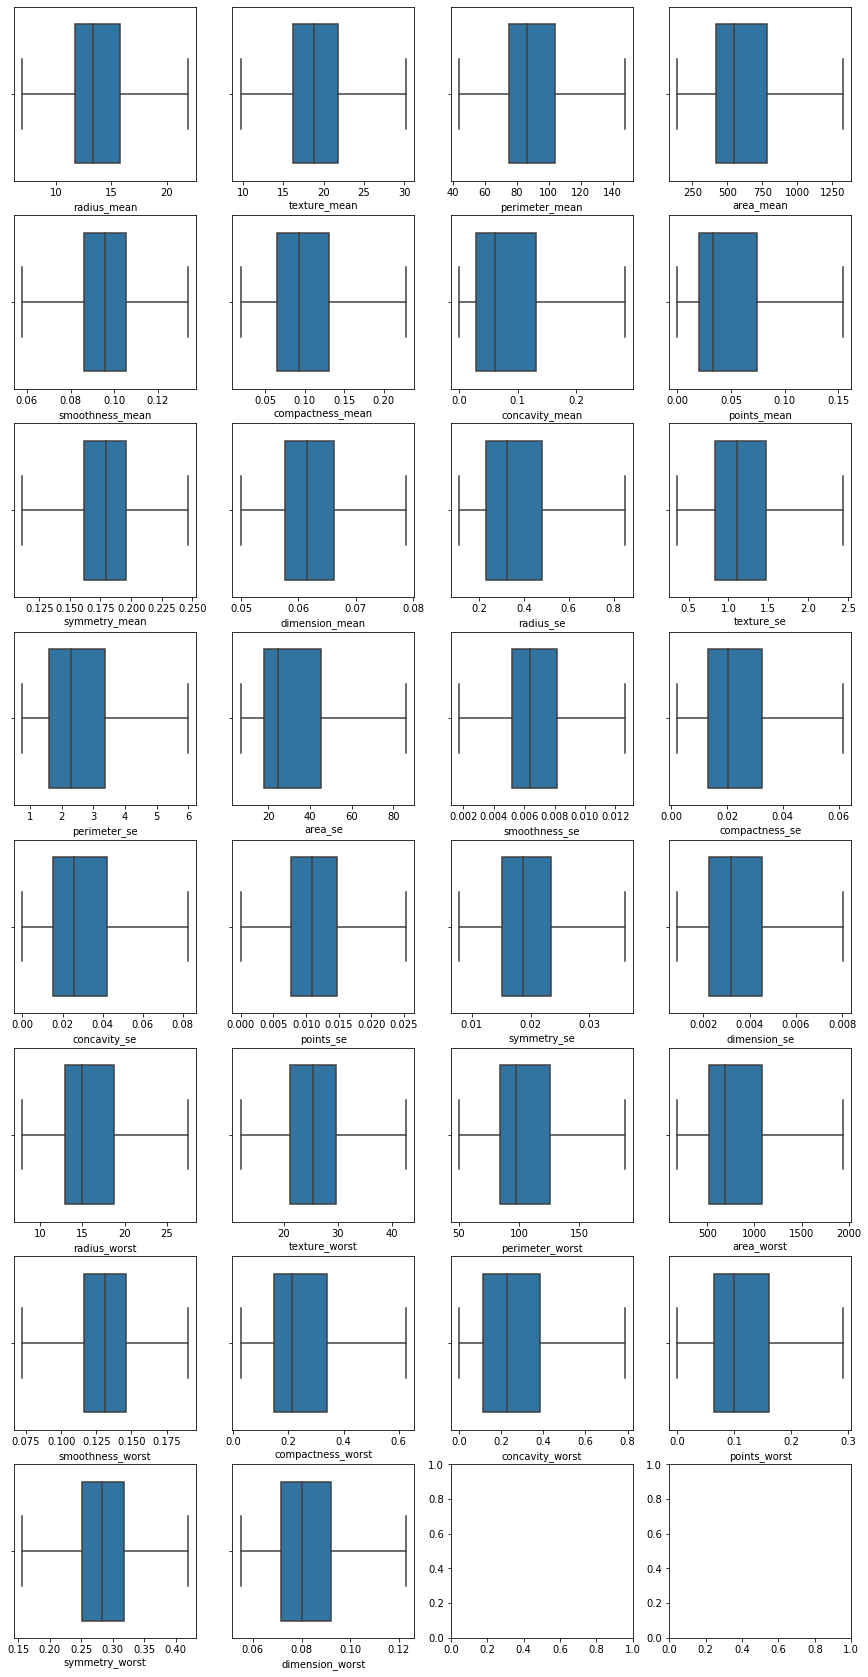

In [43]:
fig,ax=plt.subplots(8,4,figsize=(15,30))
ax=ax.flatten()
for i in range(len(num_columns)):
    sns.boxplot(x=df[num_columns].iloc[:,i],ax=ax[i])
plt.show()

In [39]:
num_columns=[]
for i in list(df.columns):
    if df[i].dtype!='object':
        num_columns.append(i)
print(num_columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']


In [41]:
#imputing the outliers in one go
for i in num_columns:
    q3=df[i].quantile(0.75)
    q1=df[i].quantile(0.25)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df.loc[df[i]>ul,i]=ul
    df.loc[df[i]<ll,i]=ll

In [42]:
df.loc[54,'concavity_worst']

0.7855000000000001

### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

In [48]:
features=df.drop('diagnosis',axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features=pd.DataFrame(ss.fit_transform(features),columns=features.columns)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


### 1.10 Capture the class values from the 'diagnosis' colum.

In [56]:
df['diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [57]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
df['diagnosis']=ll.fit_transform(df['diagnosis'])
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32

### 1.11 Extract the independent variable X and dependent variable Y?

In [51]:
X=features
y=df['diagnosis']
X.shape

(569, 30)

### 1.12 Split the data into train and test set:(70/30)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

## 1.13 Import all the algorithms we want to test

#### 1.13a) Prepare an array with all the algorithms

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(**rf_search.best_params_)
ada=AdaBoostClassifier()
gbm=GradientBoostingClassifier()
knn=KNeighborsClassifier()
gaus=GaussianNB()

In [69]:
from sklearn.model_selection import cross_val_score,KFold
names=['Logistic Regression','Decision Tree','RandomForest','Adaboost','GradientBoost','KNN','GaussianNB']
models=[lr,dt,rf,ada,gbm,knn,gaus]
result=[]

for name,model in zip(names,models):
    kfold=KFold(n_splits=5,random_state=1)
    score=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    result.append(score)
    print('Mean ROC_AUC for',name,':',np.mean(result))

Mean ROC_AUC for Logistic Regression : 0.9933273721045459
Mean ROC_AUC for Decision Tree : 0.9546776857130117
Mean ROC_AUC for RandomForest : 0.9661284797303817
Mean ROC_AUC for Adaboost : 0.9721523791608713
Mean ROC_AUC for GradientBoost : 0.9751709200983659
Mean ROC_AUC for KNN : 0.9761407945839559
Mean ROC_AUC for GaussianNB : 0.9773531140023763


In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
vc=VotingClassifier(estimators=[(i,j) for i,j in zip(names,models)],voting='soft')
vc.fit(X,y)
y_pred=vc.predict(X)
print('roc auc score:',roc_auc_score(y,y_pred))

roc auc score: 0.9929245283018868


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as rint
rf=RandomForestClassifier()
params={'n_estimators':rint(1,200),
       'max_depth':rint(2,10)}

rf_search=RandomizedSearchCV(rf,param_distributions=params,n_iter=200,n_jobs=-1,scoring='roc_auc',cv=5,
                             return_train_score=True,random_state=1,verbose=2)

rf_search.fit(X,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019681662888>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019681237488>},
                   random_state=1, return_train_score=True, scoring='roc_auc',
                   verbose=2)

In [67]:
rf_search.best_params_

{'max_depth': 7, 'n_estimators': 34}

In [56]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold()
score=cross_val_score()

####  1.13 b) Prepare the configuration to run the (X,Y),seed=7

In [61]:
# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=7)
DT.fit(X_train,y_train)

y_train_pred_DT=DT.predict(X_train)
y_train_prob_DT=DT.predict_proba(X_train)[:,1]
y_test_pred_DT=DT.predict(X_test)
y_test_prob_DT=DT.predict_proba(X_test)[:,1]

In [63]:
# Random Forrest

In [78]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_train,y_train)

y_train_pred_RF=RF.predict(X_train)
y_train_prob_RF=RF.predict_proba(X_train)[:,1]
y_test_pred_RF=RF.predict(X_test)
y_test_prob_RF=RF.predict_proba(X_test)[:,1]

In [65]:
# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,y_train)

y_train_pred_KN=KN.predict(X_train)
y_train_prob_KN=KN.predict_proba(X_train)[:,1]
y_test_pred_KN=KN.predict(X_test)
y_test_prob_KN=KN.predict_proba(X_test)[:,1]

In [67]:
#Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)

y_train_pred_NB=NB.predict(X_train)
y_train_prob_NB=NB.predict_proba(X_train)[:,1]
y_test_pred_NB=NB.predict(X_test)
y_test_prob_NB=NB.predict_proba(X_test)[:,1]

#### 1.13 c) Every algorithm is tested and results are collected and printed?


In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
# Decision Tree
print('Accuracy of training data of Decision Tree:',accuracy_score(y_train,y_train_pred_DT))
print('Accuracy of testing  of Decision Tree:',accuracy_score(y_test,y_test_pred_DT))
print('AUC score of training data of Decision Tree:',roc_auc_score(y_train,y_train_prob_DT))
print('AUC score of testing data of Decision Tree:',roc_auc_score(y_test,y_test_prob_DT))

Accuracy of training data of Decision Tree: 1.0
Accuracy of testing  of Decision Tree: 0.9473684210526315
AUC score of training data of Decision Tree: 1.0
AUC score of testing data of Decision Tree: 0.9463163906339235


In [70]:
# Random Forrest
print('Accuracy of training data of Random Forrest:',accuracy_score(y_train,y_train_pred_RF))
print('Accuracy of testing  of Random Forrest:',accuracy_score(y_test,y_test_pred_RF))
print('AUC score of training data of Random Forrest:',roc_auc_score(y_train,y_train_prob_RF))
print('AUC score of testing data of Random Forrest:',roc_auc_score(y_test,y_test_prob_RF))

Accuracy of training data of Random Forrest: 0.9899497487437185
Accuracy of testing  of Random Forrest: 0.9590643274853801
AUC score of training data of Random Forrest: 0.9998359580052494
AUC score of testing data of Random Forrest: 0.9918617932609937


In [71]:
#KNN
print('Accuracy of training data of KNN:',accuracy_score(y_train,y_train_pred_KN))
print('Accuracy of testing data of KNN:',accuracy_score(y_test,y_test_pred_KN))
print('AUC score of training data of KNN:',roc_auc_score(y_train,y_train_prob_KN))
print('AUC score of testing data of KNN:',roc_auc_score(y_test,y_test_prob_KN))

Accuracy of training data of KNN: 0.9723618090452262
Accuracy of testing data of KNN: 0.9883040935672515
AUC score of training data of KNN: 0.9960903324584427
AUC score of testing data of KNN: 0.998500856653341


In [72]:
#NB
print('Accuracy of training data of NB:',accuracy_score(y_train,y_train_pred_NB))
print('Accuracy of testing data of NB:',accuracy_score(y_test,y_test_pred_NB))
print('AUC score of training data of NB:',roc_auc_score(y_train,y_train_prob_NB))
print('AUC score of testing data of NB:',roc_auc_score(y_test,y_test_prob_NB))

Accuracy of training data of NB: 0.9296482412060302
Accuracy of testing data of NB: 0.9415204678362573
AUC score of training data of NB: 0.9861384514435695
AUC score of testing data of NB: 0.9867932609937179


#### 1.13 d) boxplot algorithm comparison

In [73]:
from sklearn.linear_model import LogisticRegression

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Mean AUC score for:',name,':',cv_results.mean())

Mean AUC score for: LR : 0.993386396011396
Mean AUC score for: DT : 0.9231558340610198
Mean AUC score for: KNN : 0.9828414020166472
Mean AUC score for: RF : 0.9825116818633604
Mean AUC score for: NB : 0.9864782090200318


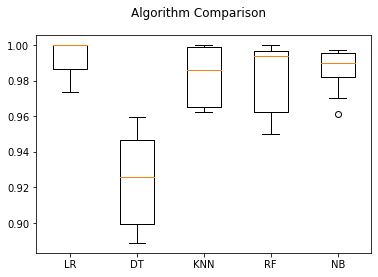

In [83]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()